# Absenteeism project

In this Notebook, we inspect, preprocess, clean, format, and extract information about the absence at work. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Loading and inspecting the data

Let us print the shortened version of the data

In [2]:
raw_data = pd.read_csv(r'Absenteeism-data.csv')
df = raw_data.copy()
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


ID is not needed, let's drop it

In [3]:
df = df.drop(['ID'], axis = 1)
df

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


We have 29 reasons for abscence, from 0 to 28, as seen below:

In [4]:
df['Reason for Absence'].min()

0

In [5]:
df['Reason for Absence'].max()

28

The reasons are the following:

| ID  | Reason |
| ------------- | ------------- |
| 0  | No data  |
| 1  | Certain infectious and parasitic diseases  |
| 2 | Neoplasms |
| 3  | Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  |
| 4  | Endocrine, nutritional and metabolic diseases  |
| 5  | Mental and behavioural disorders  |
| 6  | Diseases of the nervous system  |
| 7  | Diseases of the eye and adnexa  |
| 8  | Diseases of the ear and mastoid process  |
| 9  | Diseases of the circulatory system  |
| 10  | Diseases of the respiratory system  |
| 11  | Diseases of the digestive system  |
| 12  | Diseases of the skin and subcutaneous tissue  |
| 13 | Diseases of the musculoskeletal system and connective tissue  |
| 14 | Diseases of the genitourinary system  |
| 15 | Pregnancy, childbirth and the puerperium  |
| 16 | Certain conditions originating in the perinatal period  |
| 17 | Congenital malformations, deformations and chromosomal abnormalities  |
| 18 | Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  |
| 19 | Injury, poisoning and certain other consequences of external causes  |
| 20 | External causes of morbidity and mortality  |
| 21 | Factors influencing health status and contact with health services  |
| 22 | Patient follow-up  |
| 23 | Medical consultation  |
| 24 | Blood donation  |
| 25 | Laboratory examination  |
| 26 | Unjustified absence  |
| 27 | Physiotherapy  |
| 28 | Dental consultation  |

We can print unique numbers the following way

In [6]:
pd.unique(df['Reason for Absence'])

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [7]:
# or
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

There is the following number of unique IDs in the data:

In [8]:
len(df['Reason for Absence'].unique()) 

28

There should be 29 numbers, including zero, so 1 number is missing. Let us see which number is missing by eye

In [9]:
sorted(df['Reason for Absence'].unique()) 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

Thus, number 20 is missing.

Text(0, 0.5, 'Counts')

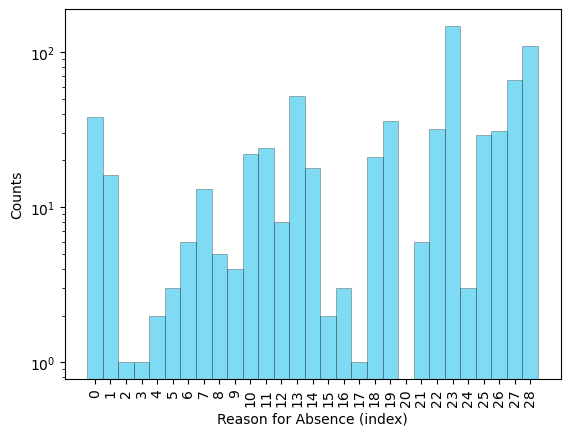

In [10]:
x_tick_pos = np.linspace(0.5,28.5,29)
a,b,c=plt.hist(df['Reason for Absence'], bins=29, color='#00B7EB', 
         alpha=0.5, edgecolor='black', linewidth=0.4, log=True,
         range=[0,29.0])
_ = plt.xticks(x_tick_pos, labels=[str(int(pos-0.5)) 
                                   for pos in x_tick_pos], rotation='vertical')
plt.xlabel('Reason for Absence (index)')
plt.ylabel('Counts')

## Preprocessing the data

To process the data further more easily, we transform the column "Reasons for Abscence" into a matrix where all reasons, instead of being integers, are now indicated by 0 and 1 along the new dimension. 

In [11]:
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


We verify that every entry has only *one* reason corresponding to it, no more no less. 

In [12]:
reason_columns['check'] = reason_columns.sum(axis = 1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
696,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1


In [13]:
reason_columns['check'].sum(axis = 0)

700

In [14]:
reason_columns['check'].unique()

array([1])

Indeed, as we showed, the number of reasons for each column is one. We do not need the "check" column anymore, so let us drop it.

In [15]:
reason_columns = reason_columns.drop(['check'], axis = 1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


We also make sure to drop column 0 to avoid potrntial multicollinearity issues. This is a default option in `get_dummies()`.

In [16]:
reason_columns = pd.get_dummies(df['Reason for Absence'],drop_first = 0)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


## Grouping reasons for abscence

First, let us drop the column with reasons from `df`.

In [17]:
df = df.drop(['Reason for Absence'], axis = 1)

In [18]:
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,24/05/2018,235,16,32,237.656,25,3,0,0,2


We shall group reasons into the following categories:

- Type 1: reasons 1-14
- Type 2: reasons 15-17
- Type 3: reasons 18-21
- Type 4: reasons 22-28

In [19]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

In [20]:
reason_type_1

0      False
1      False
2      False
3       True
4      False
       ...  
695     True
696     True
697     True
698    False
699    False
Length: 700, dtype: bool

Let us add these "reason groups" back into `df`, instead of reasons themselves. Now, we have additional columns `0, 1, 2, 3` for reason groups.

In [21]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

Let us give these new columns proper names.

In [22]:
column_name =  ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
                'Daily Work Load Average', 'Body Mass Index', 'Education',
                'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [23]:
df.columns = column_name

In [24]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True


For convenience, we also reorder columns.

In [25]:
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Date',
                          'Transportation Expense', 'Distance to Work', 'Age',
                          'Daily Work Load Average', 'Body Mass Index', 'Education',
                          'Children', 'Pets', 'Absenteeism Time in Hours']

In [26]:
df = df[column_names_reordered]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,False,False,False,False,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,False,False,False,True,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,True,False,False,False,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,False,False,False,True,23/07/2015,289,36,33,239.554,30,1,2,1,2


Let us checkpoint this new `df`.

In [27]:
df_reason_mod = df.copy()

In [28]:
df_reason_mod

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,False,False,False,False,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,False,False,False,True,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,True,False,False,False,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,False,False,False,True,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,True,False,False,False,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,True,False,False,False,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,True,False,False,False,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,False,False,False,True,24/05/2018,235,16,32,237.656,25,3,0,0,2


## Data formatting and extraction

Below, we introduce a proper format for the date. It is used to be of type `str`.

In [29]:
type(df_reason_mod['Date'][0])

str

In [30]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format = '%d/%m/%Y')
type(df_reason_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Now it's in a `Timestamp` format.

In [31]:
df_reason_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Reason_1                   700 non-null    bool          
 1   Reason_2                   700 non-null    bool          
 2   Reason_3                   700 non-null    bool          
 3   Reason_4                   700 non-null    bool          
 4   Date                       700 non-null    datetime64[ns]
 5   Transportation Expense     700 non-null    int64         
 6   Distance to Work           700 non-null    int64         
 7   Age                        700 non-null    int64         
 8   Daily Work Load Average    700 non-null    float64       
 9   Body Mass Index            700 non-null    int64         
 10  Education                  700 non-null    int64         
 11  Children                   700 non-null    int64         
 12  Pets    

#### Months

This is how we can extract a month from a `DataFrame`:

In [32]:
df_reason_mod['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [33]:
df_reason_mod['Date'][0].month

7

In [34]:
df_reason_mod.shape

(700, 14)

In [35]:
list_months = []
for i in range(700):
    list_months.append(df_reason_mod['Date'][i].month)
print(len(list_months), list_months)

700 [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

For convenience, let us add a month value of absence into a new column.

In [36]:
df_reason_mod['Month Value'] = list_months
df_reason_mod.head(5)

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,False,False,False,True,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,False,False,False,False,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,False,False,False,True,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,True,False,False,False,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,False,False,False,True,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


#### Weeks

Let us do the same for the day of the week (day start from 0).

In [37]:
df_reason_mod['Date'][699].weekday()

3

In [38]:
df_reason_mod['Date'][699]

Timestamp('2018-05-31 00:00:00')

In [39]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [40]:
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)

In [41]:
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,False,False,False,True,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,False,False,False,False,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,False,False,False,True,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,True,False,False,False,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,False,False,False,True,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


Let us checkpoint the data, following date adjustments.

In [42]:
df_reason_date_mod = df_reason_mod.copy()
df_reason_date_mod

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,False,False,False,True,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,False,False,False,False,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,False,False,False,True,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,True,False,False,False,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,False,False,False,True,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,True,False,False,False,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2
696,True,False,False,False,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2
697,True,False,False,False,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,3
698,False,False,False,True,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,3


## Reformatting the Education column

There are four values in this column:

In [43]:
df_reason_date_mod['Education'].unique()

array([1, 3, 2, 4])

In [44]:
df_reason_date_mod['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [45]:
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0,2:1,3:1,4:1})

In [46]:
df_reason_date_mod['Education'].unique()

array([0, 1])

In [47]:
df_reason_date_mod['Education'].value_counts()

Education
0    583
1    117
Name: count, dtype: int64

A final checkpoint

In [48]:
df_cleaned = df_reason_date_mod.copy()
df_cleaned.head(10)

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,False,False,False,True,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1
1,False,False,False,False,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1
2,False,False,False,True,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2
3,True,False,False,False,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3
4,False,False,False,True,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3
5,False,False,False,True,2015-07-10,179,51,38,239.554,31,0,0,0,2,7,4
6,False,False,False,True,2015-07-17,361,52,28,239.554,27,0,1,4,8,7,4
7,False,False,False,True,2015-07-24,260,50,36,239.554,23,0,4,0,4,7,4
8,False,False,True,False,2015-07-06,155,12,34,239.554,25,0,2,0,40,7,0
9,False,False,False,True,2015-07-13,235,11,37,239.554,29,1,1,1,8,7,0
